# Mediciones de humedad en Buenos Aires

El archivo humedad.csv contiene los datos de porcentaje de humedad diaria de
Buenos Aires en 2020. Como los datos de humedad muestran periodicidad anual, se propuso un
modelo:

f(t) = c1 + c2 sin(t(2pi/366)) + c3 sin(t(4pi/366))

Debo hallar los coefcientes c1, c2, c3 que mejor ajustan los datos en el sentido de mínimos cuadrados.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datos = pd.read_csv("humedad.csv", sep=",", decimal=".")   # dataFrame
datosNP = datos.to_numpy()
print(datos)

       t    humedad
0      1  80.334616
1      2  80.249820
2      3  80.448725
3      4  80.730281
4      5  80.940629
..   ...        ...
361  362  79.897607
362  363  79.763707
363  364  80.020422
364  365  80.050444
365  366  80.125403

[366 rows x 2 columns]


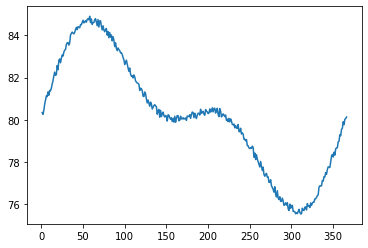

In [4]:
t = datosNP[:,0]
humedad = datosNP[:,1]
plt.plot(t, humedad)
# Quiero ajustar una formula y_i = c_1 + c_2 * sin(2*pi*t_i/366) + c_3 * sin(4*pi*t_i/366)

In [5]:
t1 = np.sin(2*np.pi*t/366)
t2 = np.sin(4*np.pi*t/366)

[80.19364109  3.22228119  1.99004968]


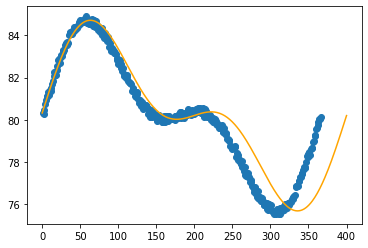

In [6]:
A = np.c_[np.ones(len(t)),t1,t2]
At=np.transpose(A)
c = np.linalg.solve(At@A,At@humedad)
print(c)
plt.scatter(t,humedad)
xplot = np.linspace(0,400,366)
plt.plot(xplot,c[0]+c[1]*t1+c[2]*t2,'orange')

In [7]:
print(c[0],"+",c[1],"*t1 +",c[2],"*t2")

80.19364108909838 + 3.22228118967913 *t1 + 1.9900496759725756 *t2


Los coefcientes c1, c2, c3 que mejor ajustan los datos son:
c1 = 80.19364108909838,
c2 = 3.22228118967913,
c3 = 1.9900496759725756